In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import rasterio as rio

In [31]:
RAW_DATA_DIR = Path('raw_data/jd')
PROCESSED_DATA_DIR = Path('datasets/yields')

In [9]:
# Check for the existence of the directories
if not RAW_DATA_DIR.exists():
    raise Exception(f"Directory {RAW_DATA_DIR} does not exist")
PROCESSED_DATA_DIR.mkdir(exist_ok=True)


# Get years from the raw data directory
years = [f.name for f in RAW_DATA_DIR.iterdir() if f.is_dir()]
print(years)

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [ ]:
# Find .tifs that start with harv in RAW_DATA_DIR/{year}/rasters

rasters = [tif for year in years for tif in RAW_DATA_DIR.joinpath(year, 'rasters').glob('harv*.tif')]

len(rasters)


312

In [ ]:
# For each harvest raster we extract the yield and save it as a new .tif in PROCESSED_DATA_DIR
# The new tifs will be named with the crop name instead of harv to make it easier to identify them

for raster in rasters:
    with rio.open(raster) as src:

        # Get index of vryieldvol band and read it
        band_index = src.tags()['bands_order'].split(',').index('vryieldvol') # also could target 'wetmass' I guess
        vryieldvol = src.read(band_index + 1)

        crop_name = src.tags()['crop']

        # Replace harv in filename with crop name
        filename = raster.name.replace('harv', crop_name)

        # Update metadata to reflect that there is only one band
        profile = src.profile
        profile.update(count=1)

        # Save vryieldvol band as a new .tif in PROCESSED_DATA_DIR
        with rio.open(PROCESSED_DATA_DIR.joinpath(filename), 'w', **profile) as dst:
            dst.write(vryieldvol, 1)
            dst.update_tags(**src.tags())


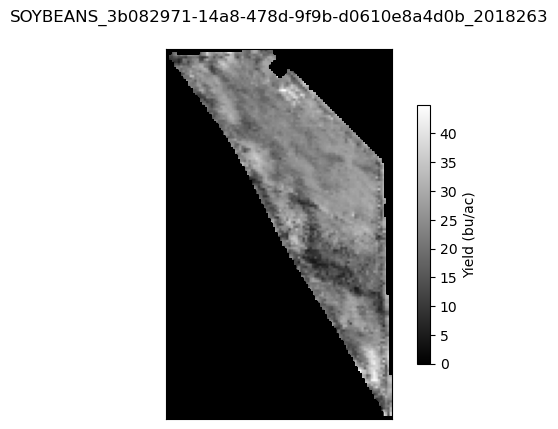

In [ ]:
path = PROCESSED_DATA_DIR/"SOYBEANS_3b082971-14a8-478d-9f9b-d0610e8a4d0b_2018263.tif"

# fig, ax = plt.subplots(dpi=300, figsize=(8, 8))
fig, ax = plt.subplots()

with rio.open(path) as src:
    max_val = src.read(1).max()
    im = ax.imshow(src.read(1), cmap='gray', vmin=0, vmax=max_val)
    
    # Create the color bar
    cbar = plt.colorbar(im, ax=ax, shrink=0.7)
    cbar.set_label('Yield (bu/ac)')
    
    # Set the title
    ax.set_title(path.stem, pad=20, wrap=True)

    # Remove x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()